In [1]:
%matplotlib inline
import seaborn as sns
from data_pipeline import get_handcrafted_raw_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import AA_NAMES, plot_violin, plot_distribution, aminoacid_corr_heatmap, densities_joy_plot, aminoacid_pairs_heatmap

In [2]:
train, test, class_dict = get_handcrafted_raw_data()
class_dict_inv = {v: k for k, v in class_dict.items()}
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)
df_train_dummy = pd.get_dummies(df_train, columns=['class'])

Max sequence length test: 1876
Max sequence length: 13100
Train sequences: 9222
Test sequences: 20
Class balance: Counter({2: 3314, 0: 3004, 3: 1605, 1: 1299})
Class balance: Counter({None: 20})


# Features analysis

## Sequence length

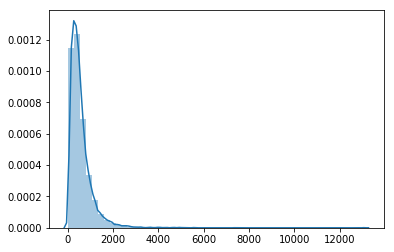

In [3]:
plot_distribution(train, 'seq_len');

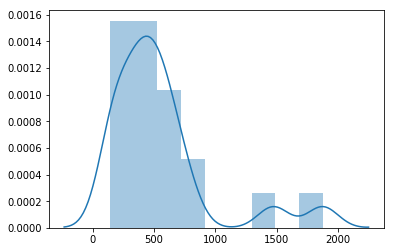

In [4]:
plot_distribution(test, 'seq_len');

The sequence length rarely exceeds 2000.

## Molecular weight

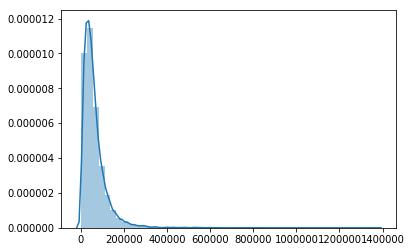

In [5]:
plot_distribution(train, 'molecular_weight');

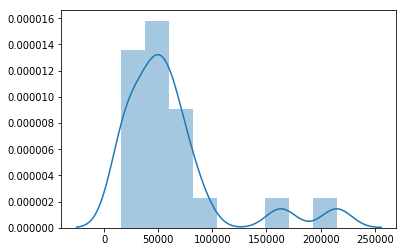

In [6]:
plot_distribution(test, 'molecular_weight');

The distributions look similar to the sequence length ones. The sequence length and the molecular weights are highly correlated.

## Class-related sequence length

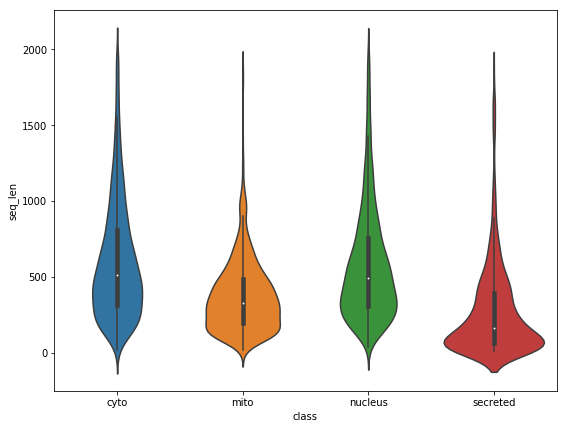

In [7]:
plot_violin(df_train, class_dict, 'seq_len', 2000)

## Class-related molecular weight

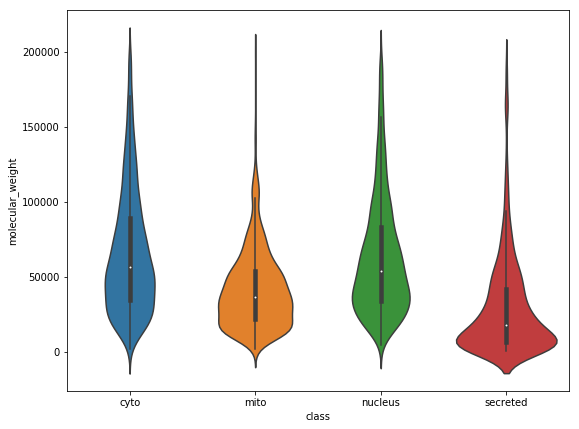

In [8]:
plot_violin(df_train, class_dict, 'molecular_weight', 200000)

## Class-related hydrophobicity and hydrophilicity

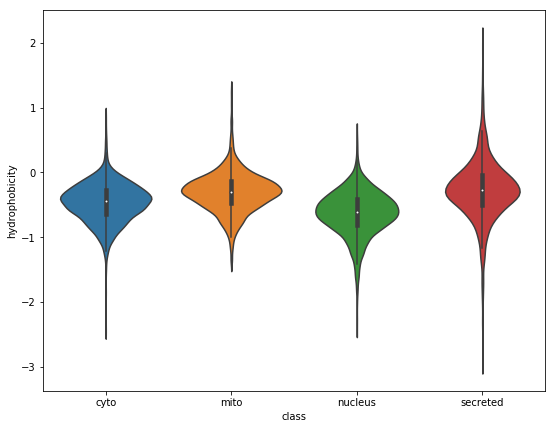

In [9]:
plot_violin(df_train, class_dict, 'hydrophobicity')

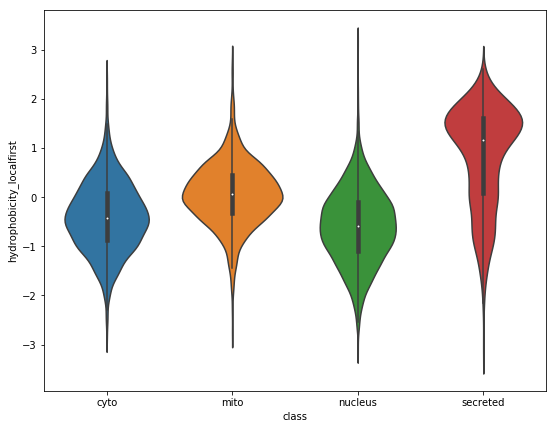

In [10]:
plot_violin(df_train, class_dict, 'hydrophobicity_localfirst')

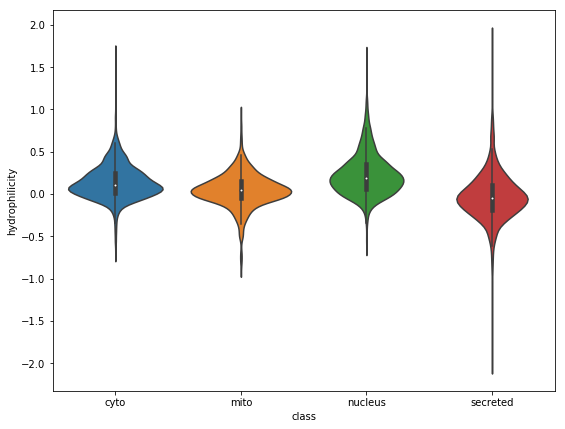

In [11]:
plot_violin(df_train, class_dict, 'hydrophilicity')

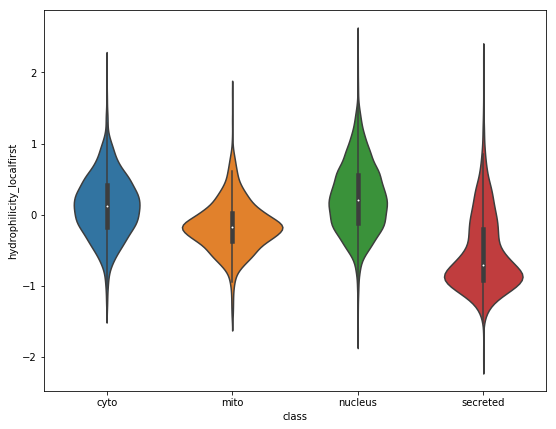

In [12]:
plot_violin(df_train, class_dict, 'hydrophilicity_localfirst')

## Other features for each subcellular location

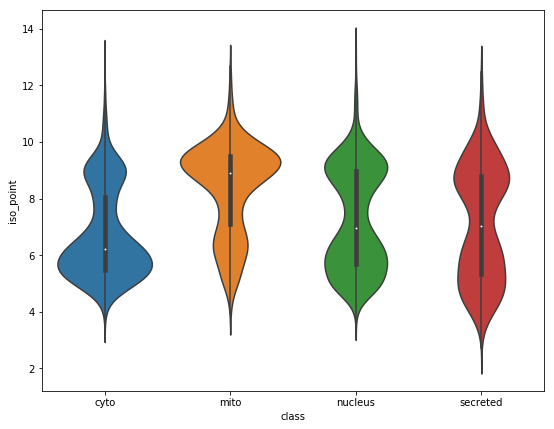

In [13]:
plot_violin(df_train, class_dict, 'iso_point')

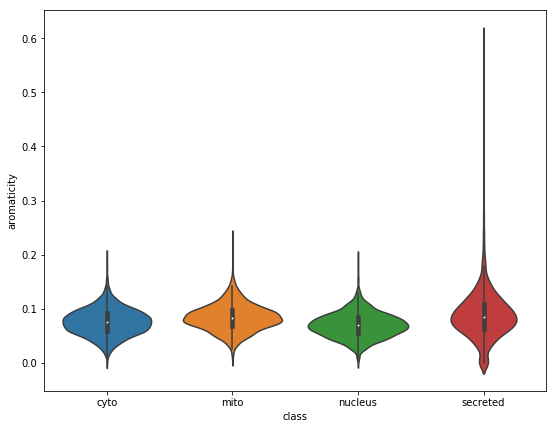

In [14]:
plot_violin(df_train, class_dict, 'aromaticity')

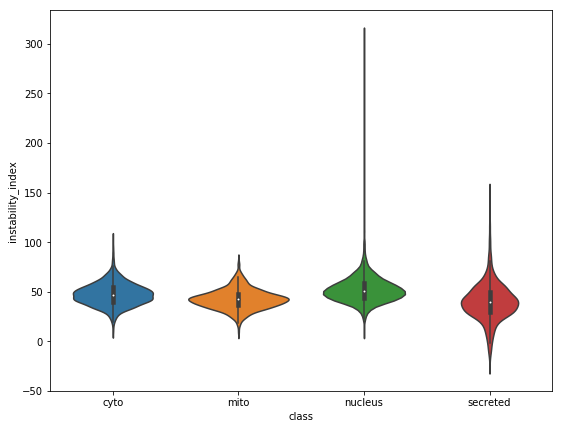

In [15]:
plot_violin(df_train, class_dict, 'instability_index')

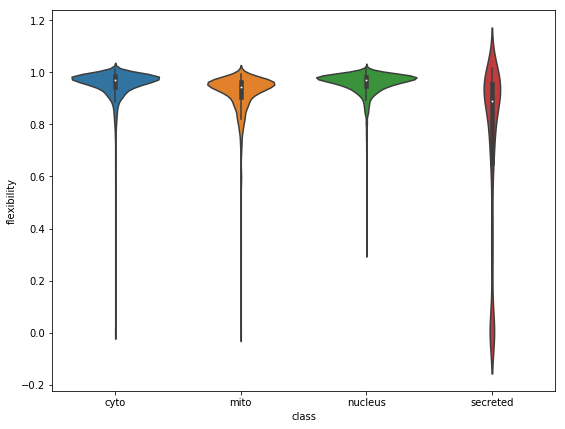

In [16]:
plot_violin(df_train, class_dict, 'flexibility')

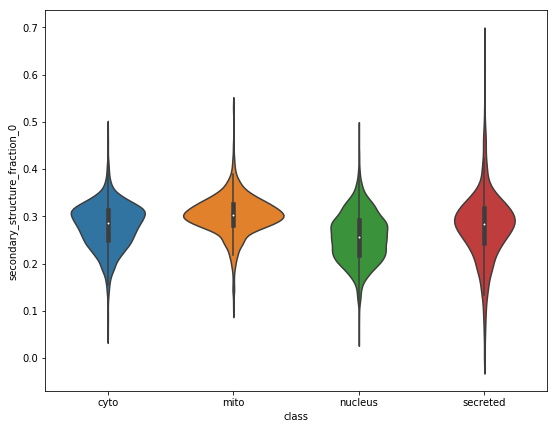

In [17]:
plot_violin(df_train, class_dict, 'secondary_structure_fraction_0')

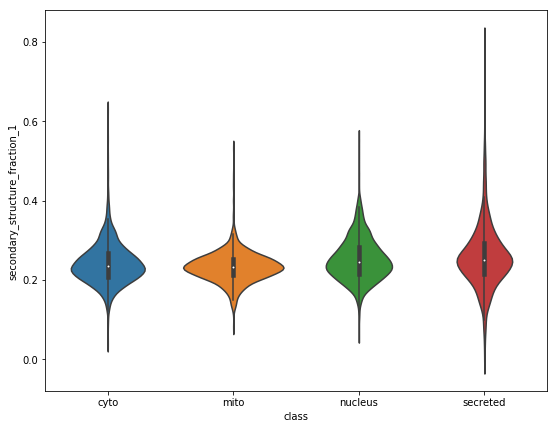

In [18]:
plot_violin(df_train, class_dict, 'secondary_structure_fraction_1')

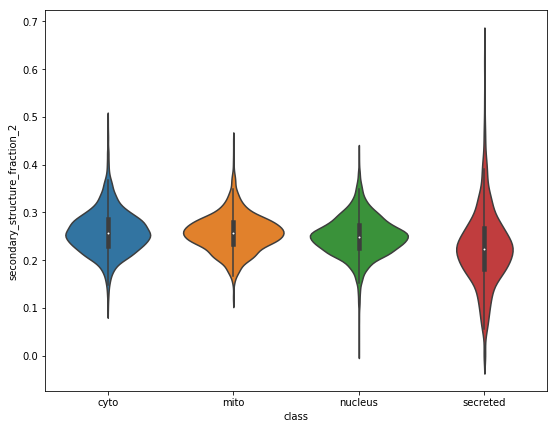

In [19]:
plot_violin(df_train, class_dict, 'secondary_structure_fraction_2')

## Aminoacid frequencies analysis

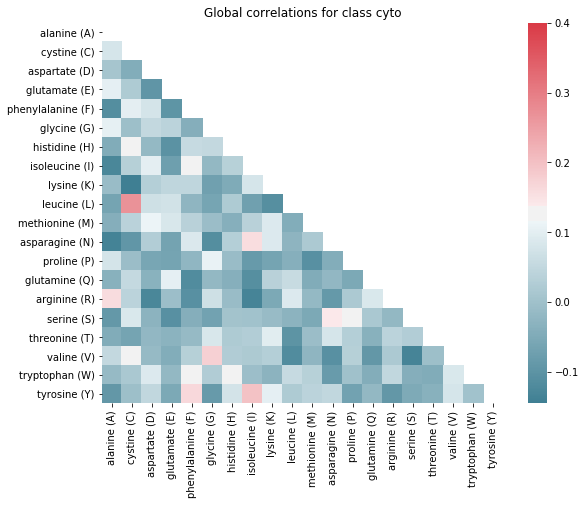

In [20]:
aminoacid_corr_heatmap(df_train_dummy,
                       df_train_dummy[df_train_dummy['class_0'] == 1],
                       'counts_global_',
                       title='Global correlations for class {}'.format(class_dict_inv[0]))

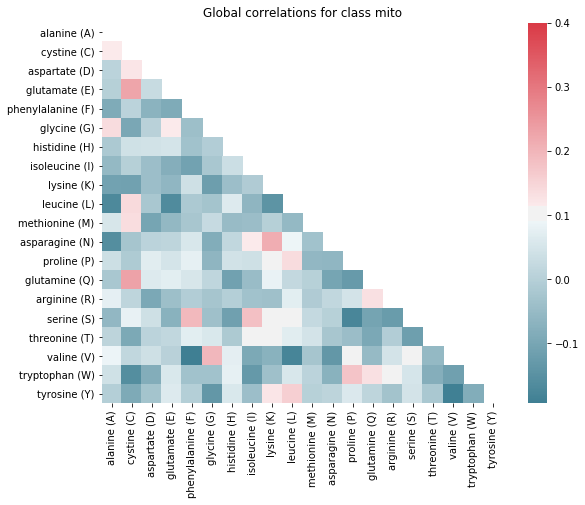

In [21]:
aminoacid_corr_heatmap(df_train_dummy,
                       df_train_dummy[df_train_dummy['class_1'] == 1],
                       'counts_global_',
                        title='Global correlations for class {}'.format(class_dict_inv[1]))

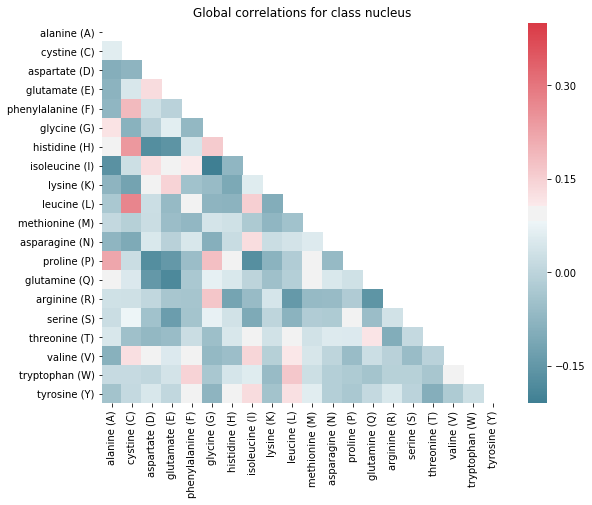

In [22]:
aminoacid_corr_heatmap(df_train_dummy,
                       df_train_dummy[df_train_dummy['class_2'] == 1],
                       'counts_global_',
                       title='Global correlations for class {}'.format(class_dict_inv[2]))

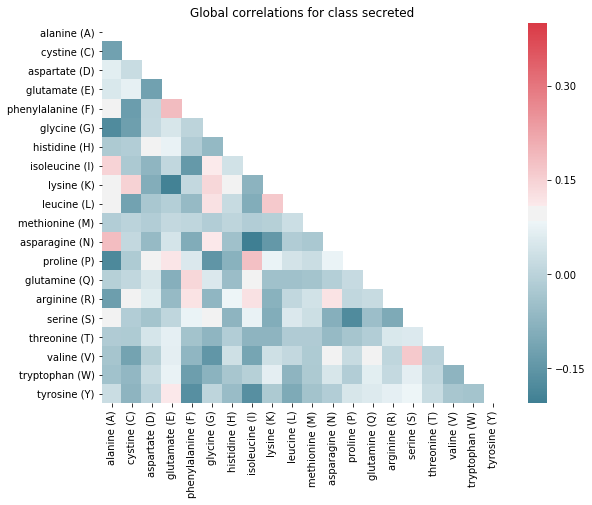

In [23]:
aminoacid_corr_heatmap(df_train_dummy,
                       df_train_dummy[df_train_dummy['class_3'] == 1],
                       'counts_global_',
                       title='Global correlations for class {}'.format(class_dict_inv[3]))

## Aminoacid pairs frequencies analysis

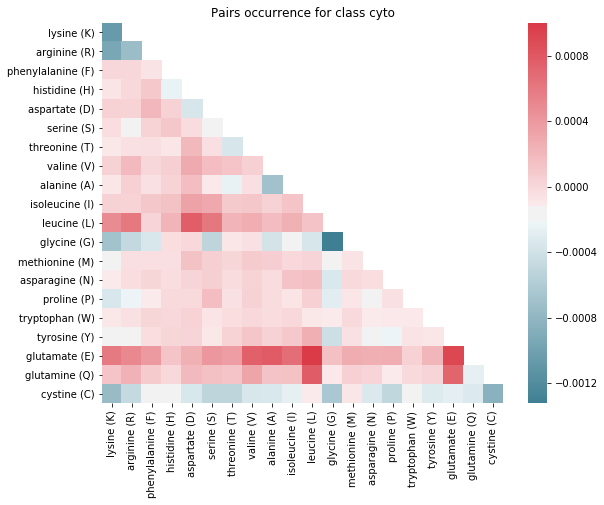

In [24]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_0'] != 1],
                       df_train_dummy[df_train_dummy['class_0'] == 1],
                       freq_key='counts_pairs_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[0]),
                       vmax=.001)

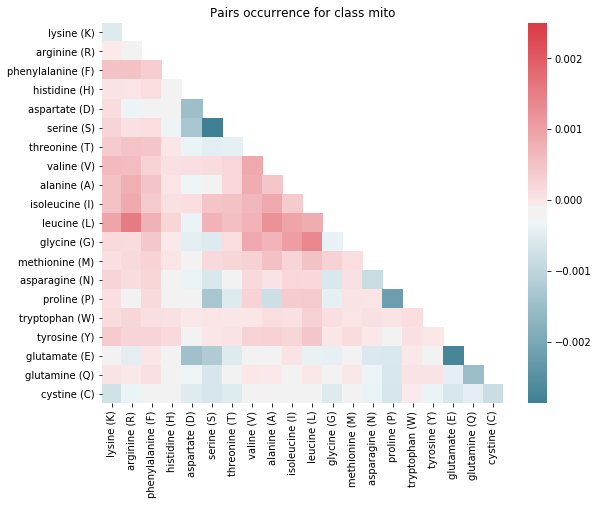

In [25]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_1'] != 1],
                       df_train_dummy[df_train_dummy['class_1'] == 1],
                       freq_key='counts_pairs_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[1]),
                       vmax=.0025)

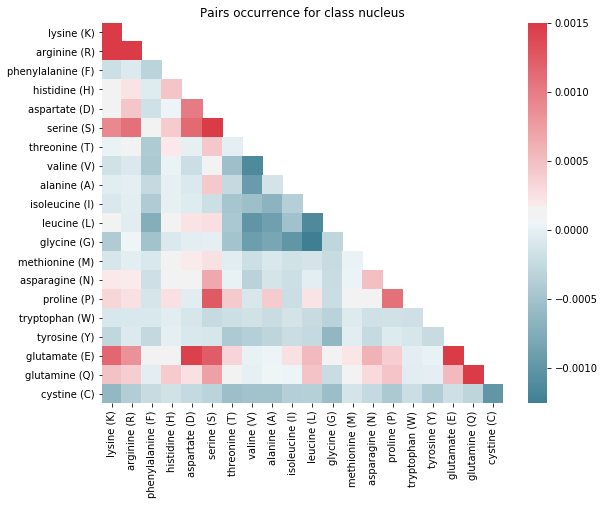

In [26]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_2'] != 1],
                       df_train_dummy[df_train_dummy['class_2'] == 1],
                       freq_key='counts_pairs_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[2]),
                       vmax=.0015)

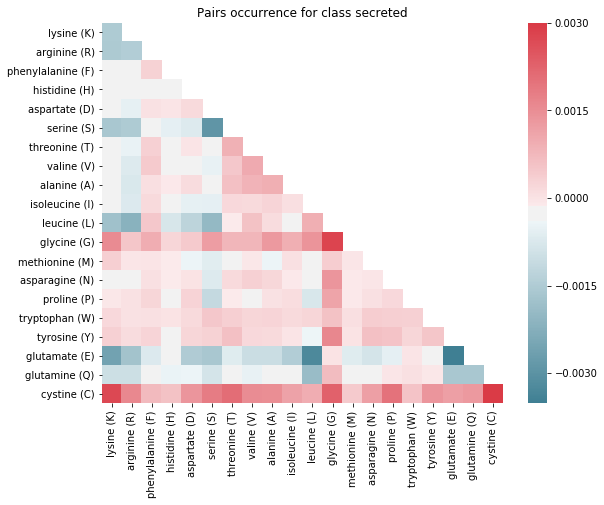

In [27]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_3'] != 1],
                       df_train_dummy[df_train_dummy['class_3'] == 1],
                       freq_key='counts_pairs_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[3]),
                       vmax=.003)

## Aminoacid local pairs frequencies analysis

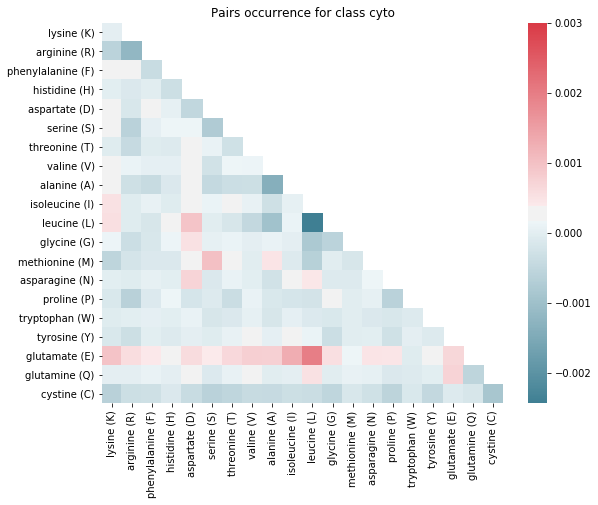

In [28]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_0'] != 1],
                       df_train_dummy[df_train_dummy['class_0'] == 1],
                       freq_key='counts_pairs_localfirst_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[0]),
                       vmax=.003)

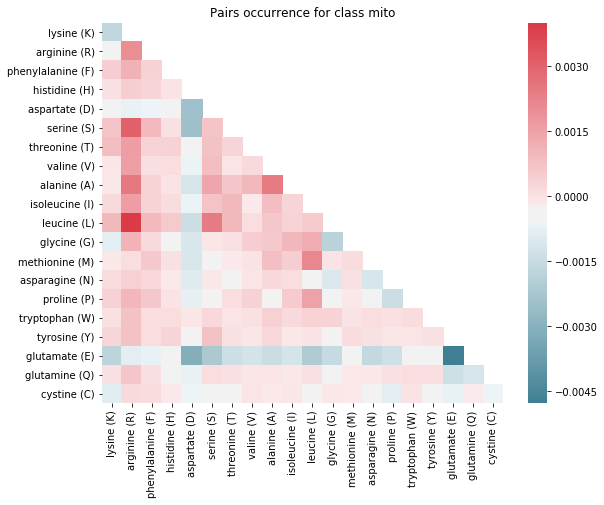

In [29]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_1'] != 1],
                       df_train_dummy[df_train_dummy['class_1'] == 1],
                       freq_key='counts_pairs_localfirst_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[1]),
                       vmax=.004)

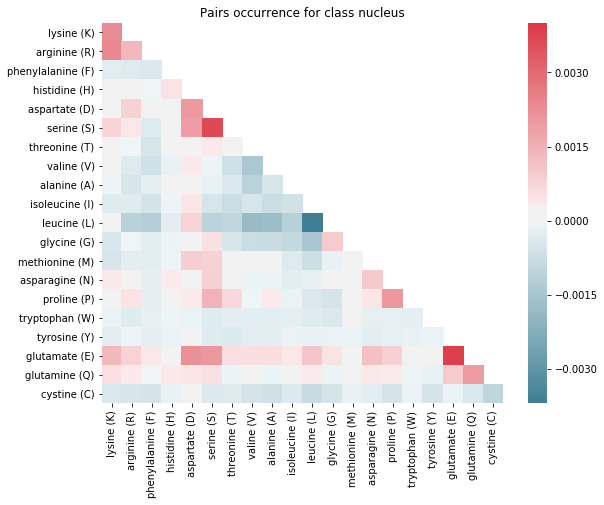

In [30]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_2'] != 1],
                       df_train_dummy[df_train_dummy['class_2'] == 1],
                       freq_key='counts_pairs_localfirst_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[2]),
                       vmax=.004)

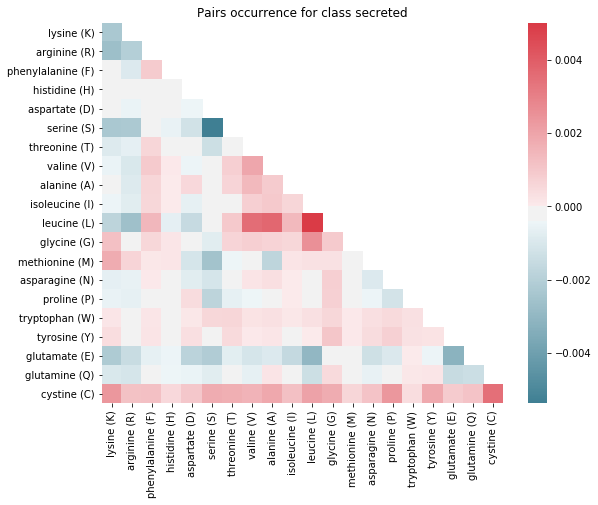

In [31]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_3'] != 1],
                       df_train_dummy[df_train_dummy['class_3'] == 1],
                       freq_key='counts_pairs_localfirst_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[3]),
                       vmax=.005)

## Distinguish nuclear from cytosolic proteins

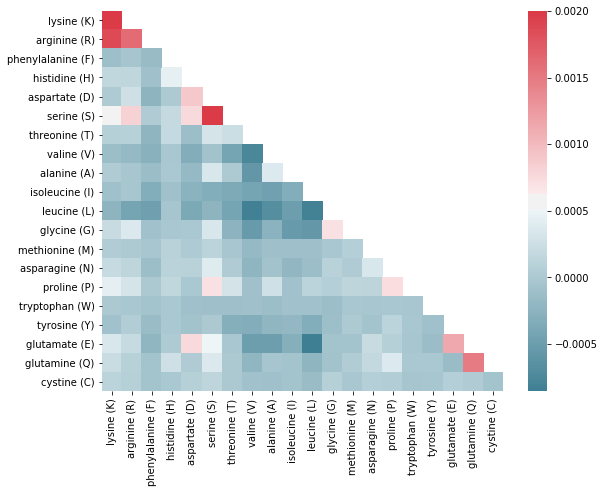

In [32]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_0'] == 1],
                       df_train_dummy[df_train_dummy['class_2'] == 1],
                       freq_key='counts_pairs_',
                       title='', #Pairs occurrence for class {}'.format(class_dict_inv[2]),
                       vmax=.002)

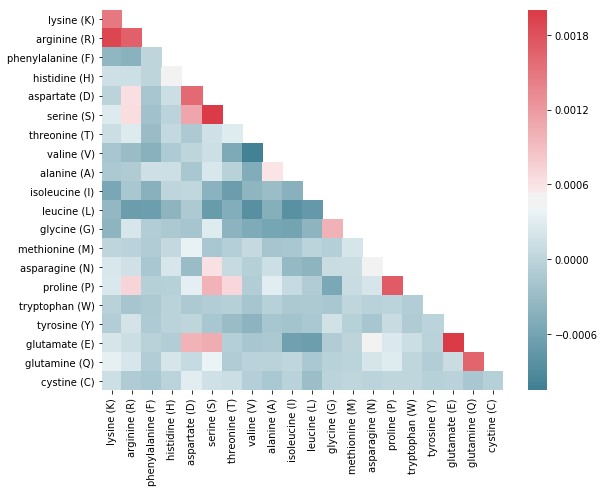

In [33]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_0'] == 1],
                       df_train_dummy[df_train_dummy['class_2'] == 1],
                       freq_key='counts_pairs_localfirst_',
                       title='', #Pairs occurrence for class {}'.format(class_dict_inv[2]),
                       vmax=.002)

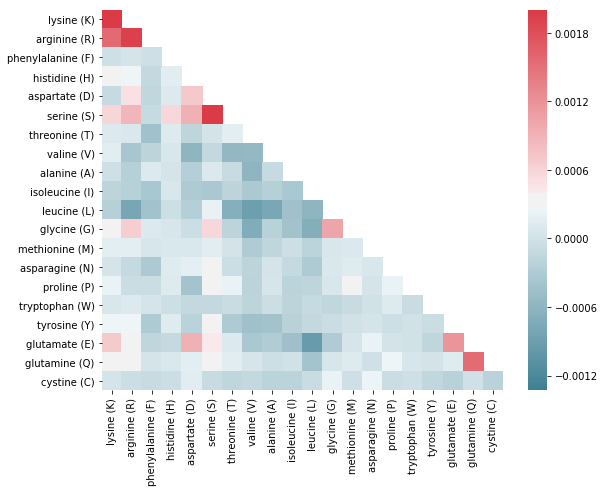

In [34]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_0'] == 1],
                       df_train_dummy[df_train_dummy['class_2'] == 1],
                       freq_key='counts_pairs_locallast_',
                       title='', #Pairs occurrence for class {}'.format(class_dict_inv[2]),
                       vmax=.002)

## Distinguish mitochondrial from cytosolic proteins

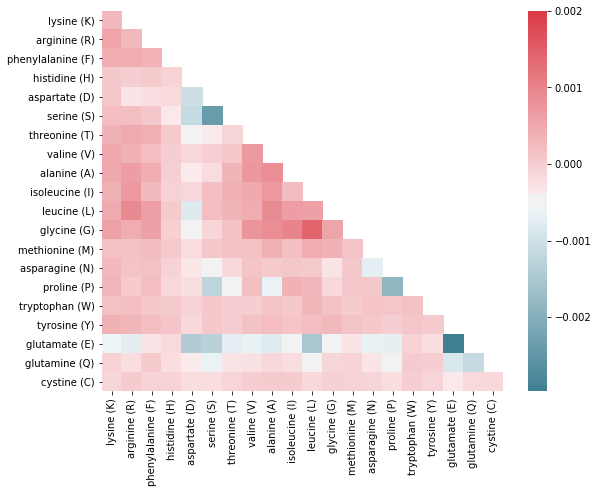

In [ ]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_0'] == 1],
                       df_train_dummy[df_train_dummy['class_1'] == 1],
                       freq_key='counts_pairs_',
                       title='', #Pairs occurrence for class {}'.format(class_dict_inv[2]),
                       vmax=.002)

In [ ]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_1'] != 1],
                       df_train_dummy[df_train_dummy['class_1'] == 1],
                       freq_key='counts_pairs_localfirst_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[1]),
                       vmax=.004)

In [ ]:
aminoacid_pairs_heatmap(df_train_dummy[df_train_dummy['class_1'] != 1],
                       df_train_dummy[df_train_dummy['class_1'] == 1],
                       freq_key='counts_pairs_locallast_',
                       title='Pairs occurrence for class {}'.format(class_dict_inv[1]),
                       vmax=.004)

## Others

In [ ]:
densities_joy_plot(df_train, class_dict_inv, 'seq_len', 2000)